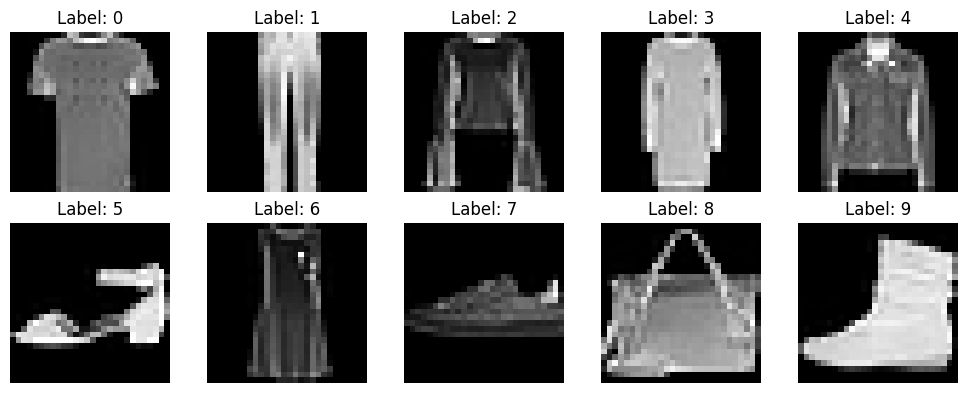

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the fixed CSV
df = pd.read_csv("C:/Users/yashj/OneDrive/Desktop/fashion-mnist_train.csv")

# Group by class label
grouped = df.groupby("label")

# Prepare empty lists for train and test splits
train_list = []
test_list = []

# Split each class group into 80% train and 20% test
for label, group in grouped:
    train_split, test_split = train_test_split(
        group, 
        test_size=0.2, 
        random_state=42, 
        shuffle=True,
        stratify=None  # We are already splitting by class manually
    )
    train_list.append(train_split)
    test_list.append(test_split)

# Concatenate all class-wise splits
train_df = pd.concat(train_list).sample(frac=1, random_state=42).reset_index(drop=True)
test_df = pd.concat(test_list).sample(frac=1, random_state=42).reset_index(drop=True)


# One example per class
examples = train_df.groupby("label").first().reset_index()

# Plot
plt.figure(figsize=(10, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    img = examples.loc[i].drop("label").values.astype(np.uint8).reshape(28, 28)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {examples.loc[i, 'label']}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [2]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,0,0,0,0,0,0,0,0,0,...,42,2,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,109,116,109,13,0,2,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,149,120,137,138,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,17,0
47996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47998,0,0,0,0,0,0,0,17,99,97,...,22,0,0,0,0,0,0,0,0,0


In [3]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,107,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,129,102,77,95,45,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11996,4,0,0,0,0,0,0,0,0,1,...,0,0,177,186,0,0,0,0,0,0
11997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,151,233,115,0,0,0,0
11998,0,0,0,0,0,0,0,0,0,0,...,62,74,97,113,65,0,0,0,0,0


In [4]:
def accuracy(y_pred_probs, y_true_labels): 
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels=np.argmax(y_true_labels, axis=1)
    return np.mean(y_pred_labels == y_true_labels)
def restore_images(df):
   X = df.drop("label", axis=1).values
   X_reshaped = X.reshape(-1, 28, 28)
   return X_reshaped

def augment_batch(images):
    all_img = []

    for img in images:
        if np.random.rand() < 0.5:                # Horizontal flip 
            img = np.fliplr(img)

        if np.random.rand() < 0.5: 
            shift_x = np.random.randint(-2, 3)        # Shift the image
            shift_y = np.random.randint(-2, 3)
            padded = np.pad(img, ((2, 2), (2, 2)), mode='constant')
            img = padded[2 + shift_y:2 + shift_y + 28, 2 + shift_x:2 + shift_x + 28] 

        if np.random.rand() < 0.5: 
            k = np.random.randint(0, 4)      
            img = np.rot90(img, k=k)      #Rotate the image
    
        all_img.append(img)

    return np.array(all_img)

In [6]:
np.random.seed(0)
X_train = train_df.drop("label", axis=1).values.astype(np.float32) 
y_train = train_df["label"].values

X_test = test_df.drop("label", axis=1).values.astype(np.float32) 
y_test = test_df["label"].values

X_train_restored = restore_images(train_df) #restored image

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train1 = (X_train - mean)/std

mean = np.mean(X_test, axis=0)
std = np.std(X_test, axis=0)
X_test1 = (X_test - mean)/std

def reshape_train_df(df):
    
    X = df.drop("label", axis=1).values.astype(np.float32)
    X_reshaped = X.reshape(-1, 28, 28)
    y = df["label"].values
    return X_reshaped, y

#activation function used
def one_hot(y, num_classes=10, smoothing = 0.2):
    assert 0 <= smoothing < 1
    y_encoded = np.full((len(y), num_classes), smoothing / (num_classes - 1))
    y_encoded[np.arange(len(y)), y] = 1.0 - smoothing
    return y_encoded

y_train_oh = one_hot(y_train, smoothing=0.1)
y_test_oh = one_hot(y_test, smoothing=0)

def relu(x, grad = False):
    if grad:
         return (x > 0).astype(float)
    else: 
         return np.maximum(0, x) 

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def sigmoid(Z, grad = False):
    s = 1/(1+np.exp(-Z))
    if grad:
        return s * (1 - s)
    else:
        return s
    

arch = [128, 10]
activations = [sigmoid, softmax]

W = []
B = []
lr = 0.01
lambda_ = 0.001
m = X_train1.shape[0] 
mm = X_test.shape[0]
best_test_accuracy = 0

# weights and bias
for i in range(len(arch)):
    if i==0:
        w = np.random.randn(X_train1.shape[1],arch[i]) * np.sqrt(2.0/ X_train1.shape[1])
    else:
        w = np.random.randn(arch[i-1],arch[i]) * np.sqrt(2.0/ arch[i-1])
    b = np.zeros((1,arch[i]))

    W.append(w)
    B.append(b)


epochs = 600
batch_size = 64
all_costs_train = []
all_acc_train = []
all_costs_test = []
all_acc_test = []
indices = np.random.permutation(m)
X_train1 = X_train1[indices]
y_train_oh = y_train_oh[indices]
epoch_cost = 0

for e in range(epochs):
    temp_cost_train = []
    temp_acc_train = []
    for i in range(0, m, batch_size):
            X_batch = X_train1[i:i+batch_size, :]
            y_batch = y_train_oh[i:i+batch_size, :]
            batch_m = X_batch.shape[0]
            X_batch_reshaped = X_batch.reshape(-1, 28, 28)
            X_batch_aug = augment_batch(X_batch_reshaped)
            X_batch = X_batch_aug.reshape(batch_m, -1)
            
            A = X_batch
            all_Z = []
            all_A = []

            for i in range(len(W)):
                    Z = A @ W[i] + B[i]
                    A = activations[i](Z)

                    all_Z.append(Z)
                    all_A.append(A)
            
            cost_train = (-1 / batch_m) * np.sum(y_batch * np.log(A + 1e-9)) + (lambda_ / (2 * batch_m)) * sum(np.sum(w_arr**2) for w_arr in W)
            
            temp_cost_train.append(cost_train)
            temp_acc_train.append(accuracy(A, y_batch))

            for i in range(len(W)-1, -1, -1):
                    if i == len(W) - 1:  # Last layer
                        dZ = all_A[i] - y_batch # shape: (m, output_size)
                    else:
                        dZ = (dZ @ W[i+1].T) * activations[i](all_Z[i], grad = True)  # element-wise
                    
                    if i == 0:
                        dW = X_batch.T @ dZ
                    else:
                        dW = all_A[i-1].T @ dZ  # matrix multiplication

                    W[i] = W[i] - (lr / batch_m) * (dW + lambda_ * W[i])
                    B[i] = B[i] - (lr / m) * np.sum(dZ, keepdims=True, axis=0)

    mean_temp_cost_train = sum(temp_cost_train) / len(temp_cost_train)
    all_costs_train.append(mean_temp_cost_train)
    mean_temp_acc_train = sum(temp_acc_train) / len(temp_acc_train)   
    all_acc_train.append(mean_temp_acc_train)

    temp_cost_test = []
    temp_acc_test = []
    for i in range(0, mm, batch_size):
            X_batch = X_test1[i:i+batch_size]
            y_batch = y_test_oh[i:i+batch_size]
            batch_mm = X_batch.shape[0]
            A = X_batch
            for i in range(len(W)):
                    Z = A @ W[i] + B[i]
                    A = activations[i](Z)
            cost_test = (-1 / batch_mm) * np.sum(y_batch * np.log(A + 1e-9)) + (lambda_ / (2 * batch_mm)) * sum(np.sum(w_arr**2) for w_arr in W)
            temp_cost_test.append(cost_test)

            temp_acc_test.append(accuracy(A, y_batch))
    mean_temp_cost_test = sum(temp_cost_test) / len(temp_cost_train)
    all_costs_test.append(mean_temp_cost_test)
    mean_temp_acc_test = sum(temp_acc_test)/ len(temp_acc_test)
    all_acc_test.append(mean_temp_acc_test)
    if best_test_accuracy < mean_temp_acc_test:
         best_test_accuracy = mean_temp_acc_test
         
         for k in range(len(W)):
              np.save("model 3/W"+str(k)+".npy", W[k])
              np.save("model 3/B"+str(k)+".npy", B[k])

    print(
    f"Epoch: {e} | "
    f"Train Cost: {mean_temp_cost_train:.4f} | "
    f"Train Accuracy: {mean_temp_acc_train:.4f} | "
    f"Test Cost: {mean_temp_cost_test:.4f} | "
    f"Test Accuracy: {mean_temp_acc_test:.4f}"
)


Epoch: 0 | Train Cost: 1.8172 | Train Accuracy: 0.4447 | Test Cost: 0.2938 | Test Accuracy: 0.6834
Epoch: 1 | Train Cost: 1.6089 | Train Accuracy: 0.5235 | Test Cost: 0.2570 | Test Accuracy: 0.7093
Epoch: 2 | Train Cost: 1.5441 | Train Accuracy: 0.5515 | Test Cost: 0.2412 | Test Accuracy: 0.7241
Epoch: 3 | Train Cost: 1.5060 | Train Accuracy: 0.5719 | Test Cost: 0.2319 | Test Accuracy: 0.7342
Epoch: 4 | Train Cost: 1.4801 | Train Accuracy: 0.5845 | Test Cost: 0.2244 | Test Accuracy: 0.7425
Epoch: 5 | Train Cost: 1.4619 | Train Accuracy: 0.5950 | Test Cost: 0.2193 | Test Accuracy: 0.7470
Epoch: 6 | Train Cost: 1.4475 | Train Accuracy: 0.6032 | Test Cost: 0.2152 | Test Accuracy: 0.7506
Epoch: 7 | Train Cost: 1.4330 | Train Accuracy: 0.6110 | Test Cost: 0.2116 | Test Accuracy: 0.7550
Epoch: 8 | Train Cost: 1.4180 | Train Accuracy: 0.6177 | Test Cost: 0.2074 | Test Accuracy: 0.7594
Epoch: 9 | Train Cost: 1.4086 | Train Accuracy: 0.6271 | Test Cost: 0.2045 | Test Accuracy: 0.7631
Epoch: 10 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the fixed CSV
df = pd.read_csv("fashion-mnist_test.csv")

X_test = df.drop("label", axis=1).values.astype(np.float32) 
y_test = df["label"].values

X_test1 = (X_test - mean)/std

#activation function used
def one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

y_test_oh = one_hot(y_test)

def relu(x, grad = False):
    if grad:
         return (x > 0).astype(float)
    else: 
         return np.maximum(0, x) 

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # For stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def sigmoid(Z, grad = False):
    s = 1/(1+np.exp(-Z))
    if grad:
        return s * (1 - s)
    else:
        return s

arch = [128, 10]
activations = [ sigmoid, softmax]

w0 =  np.load('model 3/W0.npy')
w1 =  np.load('model 3/W1.npy')
b0 = np.load('model 3/B0.npy')
b1 =np.load('model 3/B1.npy')

W = [w0, w1]
B = [b0, b1]

lambda_ = 0.001
mm = X_test1.shape[0]

batch_size = 64

temp_cost_train = []
temp_acc_train = []
 


for i in range(0, mm, batch_size):
        X_batch = X_test1[i:i+batch_size, :]
        y_batch = y_test_oh[i:i+batch_size, :]
        batch_m = X_batch.shape[0]
        
        A = X_batch
        all_Z = []
        all_A = []

        for i in range(len(W)):
                Z = A @ W[i] + B[i]
                A = activations[i](Z)

                all_Z.append(Z)
                all_A.append(A)
        
        cost_train = (-1 / batch_m) * np.sum(y_batch * np.log(A + 1e-9))
        
        temp_cost_train.append(cost_train)
        temp_acc_train.append(accuracy(A, y_batch))

print("cost:",np.mean(temp_cost_train),"acc:",np.mean(temp_acc_train))

cost: 0.44831951139388904 acc: 0.8737062101910829
